#1. Instalar o MEWpy no ambiente


In [ ]:
!pip install mewpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 32.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cobra-0.29.0-py2.py3-none-any.whl.metadata (9.3 kB)
  Using cached inspyred-1.0.2-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached jmetalpy-1.5.5-py3-none-any.whl
  Using cached reframed-1.5.3-py3-none-any.whl.metadata (4.8 kB)
  Using cached matplotlib-3.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tdqm-0.0.1-py3-none-any.whl
  Using cached httpx-0.23.0-py3-none-any.whl.metadata (52 kB)
  Using cached rfc3986-1.5.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl.metadata (15 kB)
  Using cached setuptools_scm-8.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using



#2. Baixar o modelo de _Aspergillus Niger_

Eu tenho um modelo baixado da Vera Meyer do artigo: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6158834/#MOESM11

In [ ]:
#Eu já tenho o modelo na pasta de fungos C:\Users\bruno\OneDrive\Área de Trabalho\Pastas\Mestrado\Side Projects\modelo_aspergillus_welwitschiae\mapeamento

#Importar o modelo
from cobra.io import read_sbml_model
model = read_sbml_model('/content/Aniger_ATCC1015.xml')

model


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Name,
Memory address,7a6f3644db70
Number of metabolites,1818
Number of reactions,2320
Number of genes,1325
Number of groups,0
Objective expression,1.0*DRAIN_Biomass - 1.0*DRAIN_Biomass_reverse_fcc30
Compartments,"Cytoplasm, Mitochondria, Extracellular, Peroxisome, Nucleus, Golgi, Vacuole"


#3. Entendendo o modelo:

Metabólitos, genes, reações, GPR, função objetivo, constraints, etc.

- Os fluxos sempre estão em mmol/gDWC h-1

In [ ]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
GLCe,BOUNDARY_GLCe,10,6,100.00%
HNO3e,BOUNDARY_HNO3e,3.886,0,0.00%
O2e,BOUNDARY_O2e,7.778,0,0.00%
PIe,BOUNDARY_PIe,0.115,0,0.00%
SLFe,BOUNDARY_SLFe,0.04548,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
CO2e,BOUNDARY_CO2e,-18.39,1,100.00%
H2Oe,BOUNDARY_H2Oe,-26.37,0,0.00%
He,BOUNDARY_He,-0.0112,0,0.00%
BIOMASS,DRAIN_Biomass,-0.9399,0,0.00%


In [ ]:
model.medium

{'BOUNDARY_GLCe': 10.0,
 'BOUNDARY_H2Oe': 1000.0,
 'BOUNDARY_HNO3e': 1000.0,
 'BOUNDARY_O2e': 1000.0,
 'BOUNDARY_PIe': 1000.0,
 'BOUNDARY_SLFe': 1000.0,
 'BOUNDARY_Ke': 1000.0,
 'BOUNDARY_CAe': 1000.0}

In [ ]:
print(model.objective)

Maximize
1.0*DRAIN_Biomass - 1.0*DRAIN_Biomass_reverse_fcc30


In [ ]:
model.reactions.GROWTH.reaction

'61.0 ATP + 0.38 CELLWALL + 0.00244 DNA + 61.0 H2O + LIPIDS + POOL + 0.263 Protein + 0.01814 RNA --> 61.0 ADP + BIOMASS + 61.0 PI'

In [ ]:
for c in model.constraints:
  print(c)

13GLUCAN: 0 <= -2.726*Cellwall + 2.726*Cellwall_reverse_0d736 + 1.0*r206 - 1.0*r206_reverse_35fd3 <= 0
13PDG: 0 <= 1.0*r14 - 1.0*r14_reverse_2d337 - 1.0*r15 + 1.0*r15_reverse_003a6 <= 0
14GLUCAN: 0 <= -0.389*Cellwall + 0.389*Cellwall_reverse_0d736 + 1.0*r207 - 1.0*r207_reverse_ec8b0 <= 0
2D3DGALT: 0 <= 1.0*r181 - 1.0*r181_reverse_56cf4 - 1.0*r182 + 1.0*r182_reverse_6519f <= 0
2HPAC: 0 <= 1.0*r1281 - 1.0*r1281_reverse_bc7eb + 1.0*r388 - 1.0*r388_reverse_2a5ba - 1.0*r389 + 1.0*r389_reverse_84a38 <= 0
2MAC: 0 <= 1.0*r972 - 1.0*r972_reverse_711db - 1.0*r973 + 1.0*r973_reverse_12e51 <= 0
2MACOm: 0 <= 1.0*r72 - 1.0*r72_reverse_e36ab - 1.0*r73 + 1.0*r73_reverse_c4816 <= 0
2MCITm: 0 <= 1.0*r71 - 1.0*r71_reverse_f2e40 - 1.0*r72 + 1.0*r72_reverse_e36ab <= 0
2MICITm: 0 <= 1.0*r73 - 1.0*r73_reverse_c4816 - 1.0*r74 + 1.0*r74_reverse_1d9cc <= 0
2PG: 0 <= 1.0*r16a - 1.0*r16a_reverse_89412 - 1.0*r17 + 1.0*r17_reverse_dce93 <= 0
345THBe: 0 <= -1.0*BOUNDARY_345THBe + 1.0*BOUNDARY_345THBe_reverse_f150b +

In [ ]:
model.demands

[<Reaction DRAIN_Biomass at 0x7d728d1403a0>,
 <Reaction DRAIN_Pool at 0x7d728ccf0b20>,
 <Reaction DRAIN_PROTEIN at 0x7d728ccf0be0>,
 <Reaction DRAIN_LIPIDS at 0x7d728ccf0ca0>,
 <Reaction DRAIN_CELLWALL at 0x7d728ccf0d60>,
 <Reaction DRAIN_DNA at 0x7d728ccf0e20>,
 <Reaction DRAIN_DNAm at 0x7d728ccf0ee0>,
 <Reaction DRAIN_RNA at 0x7d728ccf0fa0>,
 <Reaction DRAIN_RNAm at 0x7d728ccf1060>,
 <Reaction BOUNDARY_bLARAB at 0x7d728cbcd4e0>]

#4. Usando o MEWpy

In [ ]:
#vamos criar um simulador

from mewpy.simulation import get_simulator
simul = get_simulator(model)

In [ ]:
result_fba = simul.simulate(method='FBA')  #FBA, pFBA, lMOMA, ROOM

result_fba

objective: 0.9398547241492774
Status: OPTIMAL
Method:FBA

In [ ]:
result_fba.find()

,Flux rate
Reaction ID,
r1,1.000000e+01
r6,1.000000e+01
r7,3.162294e+01
r8,1.000000e+01
r10,1.457271e+01
...,...
r2683,1.609153e-01
r2684,-1.609153e-01
r2696,1.740160e-01


In [ ]:
result_fba.get_net_conversion()

'10.0 GLCe + 3.885628998764988 HNO3e + 7.778196990495859 O2e + 0.11499423303491996 PIe + 0.04548144981103184 SLFe --> 18.38649548745116 CO2e + 0.011201011909558032 He + 26.372827107897482 H2Oe + 0.9398547241492774 BIOMASS + 6.524279714176938e-19 DFCOPROBe'

In [ ]:
result_fba.get_metabolites_turnover()

,Turnover
Metabolite,
13GLUCAN,0.973577
13PDG,54.870753
14GLUCAN,0.138929
2D3DGALT,34.429004
2HPAC,0.000000
...,...
ACNLe,0.000000
3HPROe,0.000000
T3HPROe,0.000000


In [ ]:
simul.get_metabolite('NAD')

,Value
Attribute,
id,NAD
name,NAD+
compartment,c
formula,C21H27N7O14P2


In [ ]:
result_fba.get_metabolite('NAD')

,Value
Reaction,
r14,-54.870753
r45a,13.461184
r53a,-0.000000
r54,34.851903
r61,-0.000000
...,...
r2160,-0.000000
r2177,0.000000
r2323,-0.000000


reduced cost mostra sobre as reações e o seu impacto na função objetivo

In [ ]:
d = model.optimize().to_frame()
d.sort_values(by='reduced_costs', ascending = True).head(50)

,fluxes,reduced_costs
BOUNDARY_TRIOe,0.0,-2.473964
r2339,0.0,-2.418528
DRAIN_PROTEIN,0.0,-2.158615
r1265,0.0,-2.134121
r1266,0.0,-2.123293
DRAIN_DNAm,0.0,-1.916522
DRAIN_CELLWALL,0.0,-1.904029
r2065,0.0,-1.642694
DRAIN_DNA,0.0,-1.569694
BOUNDARY_TANAe,0.0,-1.517656


In [ ]:
model.reactions.BOUNDARY_C190e

Reaction identifier,BOUNDARY_C190e
Name,
Memory address,0x7e33472c32e0
Stoichiometry,C190e --> Nonadecanoate (extracellular) -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
model.medium = {'BOUNDARY_GLCe': 10.0,
 'BOUNDARY_H2Oe': 1000.0,
 'BOUNDARY_HNO3e': 1000.0,
 'BOUNDARY_O2e': 1000.0,
 'BOUNDARY_PIe': 1000.0,
 'BOUNDARY_SLFe': 1000.0,
 'BOUNDARY_Ke': 1000.0,
 'BOUNDARY_CAe': 1000.0,
 'BOUNDARY_C190e': 1.0}

model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
C190e,BOUNDARY_C190e,1,19,24.05%
GLCe,BOUNDARY_GLCe,10,6,75.95%
HNO3e,BOUNDARY_HNO3e,5.462,0,0.00%
O2e,BOUNDARY_O2e,14.09,0,0.00%
PIe,BOUNDARY_PIe,0.1617,0,0.00%
SLFe,BOUNDARY_SLFe,0.06394,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
CO2e,BOUNDARY_CO2e,-20.5,1,100.00%
H2Oe,BOUNDARY_H2Oe,-31.73,0,0.00%
He,BOUNDARY_He,-0.01575,0,0.00%


Shadow price mostra o impacto que aquele metabólito tem na função objetivo

In [ ]:
import pandas as pd

data = result_fba.shadow_prices
df = pd.DataFrame(list(data.items()), columns=['Reação', 'Shadow Price'])

df.sort_values(by='Shadow Price', ascending = False).head(50)

,Reação,Shadow Price
1285,2HC181COA,0.417549
866,PNTO,0.358719
35,4PPNTO,0.356805
1456,BTm,0.354833
1031,TOLUEK,0.334690
1030,TOLUEE,0.334690
1737,4F4S,0.290795
1736,4F4Sm,0.290795
33,4PPNCYS,0.264556
34,4PPNTE,0.264556


In [ ]:
model.metabolites.TOLUEK

Metabolite identifier,TOLUEK
Name,"(1R,5R,6R)-5-hydroxy-4-methyl-7-..."
Memory address,0x7e3347f0f2b0
Formula,C7H8O3
Compartment,c
In 2 reaction(s),"r2005, NE7"


parece que se eu dar um jeito de aumentar o TOLUEK eu consigo melhorar minha função objetivo.

#5. Genes/Reações essenciais

In [ ]:
simul.essential_reactions()

100%|██████████| 2320/2320 [00:27<00:00, 84.38it/s] 


['r85',
 'r87',
 'r93',
 'r94',
 'r96',
 'r136',
 'r158',
 'r185',
 'r191',
 'r192',
 'r198a',
 'r199',
 'r206',
 'r207',
 'r208',
 'r209',
 'r210',
 'r211',
 'r212',
 'r213',
 'r214',
 'r220',
 'r221',
 'r222',
 'r236',
 'r237',
 'r263',
 'r282m',
 'r278',
 'r279',
 'r280',
 'r281',
 'r302',
 'r303',
 'r304',
 'r313m',
 'r316',
 'r317',
 'r318',
 'r319',
 'r320',
 'r321',
 'r322',
 'r323',
 'r324',
 'r325',
 'r328',
 'r329',
 'r330',
 'r331',
 'r337',
 'r338',
 'r339',
 'r332',
 'r333',
 'r334',
 'r335',
 'r341',
 'r351',
 'r352',
 'r353',
 'NE3',
 'r346',
 'r349',
 'r350',
 'r355',
 'r362',
 'r363',
 'r365',
 'r373',
 'r374',
 'r375',
 'r376',
 'r377',
 'r378',
 'r379',
 'r380',
 'r381',
 'r382',
 'r383',
 'r384',
 'r385',
 'r413',
 'r424',
 'r425',
 'r426',
 'r427',
 'r428',
 'r429',
 'r430',
 'r431',
 'r432',
 'r433',
 'r434',
 'r435',
 'r437',
 'r438',
 'r441',
 'r445',
 'r447',
 'r479',
 'r480',
 'r481',
 'r483',
 'r484',
 'r485',
 'r493',
 'r494',
 'r495',
 'r497',
 'r508',
 'r5

In [ ]:
simul.essential_genes()

100%|██████████| 1325/1325 [00:19<00:00, 67.76it/s]


['1148430',
 '1107349',
 '1109262',
 '1099711',
 '1146094',
 '1114113',
 '1145701',
 '1161943',
 '1119532',
 '1097533',
 '1183143',
 '1136293',
 '1142654',
 '1012621',
 '1143808',
 '1030265',
 '1176200',
 '1112641',
 '1122357',
 '1187192',
 '1131598',
 '1182770',
 '1108173',
 '1123323',
 '1119931',
 '1118033',
 '1081703',
 '1099512',
 '1126876',
 '1104257',
 '1122368',
 '1136710',
 '1146684',
 '1107148',
 '1148202',
 '1099044',
 '1142023',
 '1185971',
 '46999',
 '1129697',
 '1162749',
 '1086696',
 '1119924',
 '1214125',
 '1158687',
 '1102023',
 '1225426',
 '1165226',
 '1110688',
 '1102713',
 '1171415',
 '1126165',
 '1116400',
 '1165880',
 '1027809',
 '1123689',
 '1180336',
 '1214186',
 '1160106',
 '1103580',
 '50815',
 '1146299',
 '1081081',
 '1154970',
 '1095920',
 '1099685',
 '1183276',
 '1110410',
 '1163354',
 '1114696',
 '1080533',
 '1163355',
 '1106171',
 '1188375',
 '1131520',
 '1174617',
 '1185892',
 '1104788',
 '1148064',
 '1183696',
 '54854',
 '1186787',
 '1102745',
 '51907',


#6. Melhorando a produção de Guanina em aspergillus Niger

In [ ]:
model.metabolites.GNe

Metabolite identifier,GNe
Name,Guanine
Memory address,0x7e3347dceec0
Formula,C5H5N5O
Compartment,e
In 2 reaction(s),"BOUNDARY_GNe, r2613"


In [ ]:
for r in model.metabolites.GNe.reactions:
  print(r, ':', r.reaction)

BOUNDARY_GNe: GNe -->  : GNe --> 
r2613: GNe <=> GN : GNe <=> GN


<AxesSubplot:xlabel='DRAIN_Biomass', ylabel='BOUNDARY_GNe'>

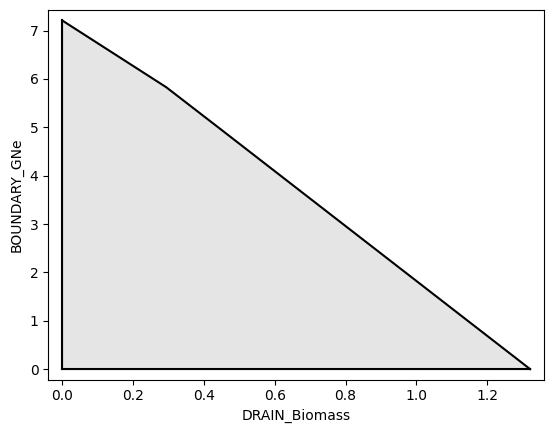

In [ ]:
%matplotlib inline
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(simul,'DRAIN_Biomass','BOUNDARY_GNe')

Nessas condições, esse é o espaço de solução para produção de Guanina. A gente observa um trade-off entre crescimento e a sua produção. Isso vai acontecer sempre que exigir uma demanda energética que compete com a biomassa.

In [ ]:
model_2 = read_sbml_model('/content/Aniger_ATCC1015.xml')

model_2.objective = 'BOUNDARY_GNe'
model_2.reactions.GROWTH.lower_bound = 0.4 #travei o crescimento em 0.5

ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


In [ ]:
model_2.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
GLCe,BOUNDARY_GLCe,10,6,100.00%
HNO3e,BOUNDARY_HNO3e,17.12,0,0.00%
O2e,BOUNDARY_O2e,0.6659,0,0.00%
PIe,BOUNDARY_PIe,0.04894,0,0.00%
SLFe,BOUNDARY_SLFe,0.01936,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
CO2e,BOUNDARY_CO2e,-26.83,1,63.44%
GNe,BOUNDARY_GNe,-3.092,5,36.56%
H2Oe,BOUNDARY_H2Oe,-45.69,0,0.00%
He,BOUNDARY_He,-0.004767,0,0.00%


In [ ]:
simul_2 = get_simulator(model_2)
result_pfba = simul.simulate(method='pFBA')  #FBA, pFBA, lMOMA, ROOM

result_pfba.find()

,Flux rate
Reaction ID,
r5a,1.000000e+01
r7,4.131836e+01
r10,1.687713e+01
r12a,1.687713e+01
r13a,1.671373e+01
...,...
r2683,2.262051e-01
r2684,-2.262051e-01
r2696,2.446212e-01


Com isso eu consigo comparar os fluxos do wild type e da minha linhagem com os parâmetros que eu quero e encontrar as diferenças!

#7. Usando algorítimos genéticos para melhorar a produção de Guanina

In [ ]:
PRODUCT = 'BOUNDARY_GNe'
BIOMASS = 'DRAIN_Biomass'

In [ ]:
from mewpy.simulation import get_simulator
sim = get_simulator(model)
sim.FVA(reactions=[PRODUCT],format='df')

,Minimum,Maximum
Reaction ID,,
BOUNDARY_GNe,0.0,0.749904


In [ ]:
from mewpy.optimization.evaluation import BPCY, TargetFlux, WYIELD

objs = [WYIELD(BIOMASS,PRODUCT)
]

from mewpy.problems import GKOProblem, GOUProblem
problem = GOUProblem(model, objs, candidate_max_size=6)

from mewpy.optimization import EA
ea = EA(problem, max_generations=5)
ea.run(simplify=True)

demorou 45mns para rodar 5 gerações (500 individuos, 100 por geração). Para ficar bom, precisa rodar 750 gerações ( 750k individuos).

In [ ]:
df_solutions = ea.dataframe()
df_solutions

,Modification,Size,WYIELD
0,{'1122357': 0.125},1,1.932023


O gene r304 diminuido em 8 vezes (1/8 = 0.125)

In [ ]:
model.genes.get_by_id('1122357')

Gene identifier,1122357
Name,52305
Memory address,0x7e3347cdf9a0
Functional,True
In 1 reaction(s),r304


In [ ]:
model.reactions.r304

Reaction identifier,r304
Name,Homoserine dehydrogenase I
Memory address,0x7e334788e230
Stoichiometry,ASPSA + NADH <=> HSER + NAD L-Aspartate 4-semialdehyde + NADH <=> L-Homoserine + NAD+
GPR,1122357
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
final_pop = ea.final_population

res = problem.simulate(solution=final_pop[0].values,method='pFBA')
res.find([PRODUCT,BIOMASS])

,Flux rate
Reaction ID,
DRAIN_Biomass,0.165149


Essa diminuição levou a um atraso considerado no crescimento, mas não produziu Guanina na solução. Pois o o WYIELD é um modo que olha rendimento e FVA.

In [ ]:
res.get_net_conversion()

'0.21074935873907152 C190e + 2.049770647495743 GLCe + 0.6827728428717589 HNO3e + 3.499025322457397 O2e + 0.020206494090914708 PIe + 0.007991884658899877 SLFe --> 2.3736299959803144 ACe + 3.0007900525045765 CO2e + 0.001968213318119843 He + 4.714776054557464 H2Oe + 0.3106481264239739 TARe + 0.16514888119730284 BIOMASS + 1.6310699285442346e-19 DFCOPROBe + 1.2684246037260054e-19 FE2e'

In [ ]:
res.simulation_constraints

{'r304': (0, 0.004560586354263519)}

Simulando com a mutação encontrada no modelo temos que o FVA vai de 0 a 6.5

In [ ]:
# additional constraint
constraints = res.simulation_constraints

simul.FVA(reactions=[PRODUCT],format='df', constraints=constraints)

,Minimum,Maximum
Reaction ID,,
BOUNDARY_GNe,0.0,6.509919


enquanto sem a alteeração do modelo vai de 0 até 0.74. Mostrando que a diminuição da expressão do gene levaria a um potencial aumento da produção de guanina

In [ ]:
simul.FVA(reactions=[PRODUCT],format='df')

,Minimum,Maximum
Reaction ID,,
BOUNDARY_GNe,0.0,0.749904


#8. Sampling





In [ ]:
from cobra.io import load_model
from cobra.sampling import sample

s = sample(model, 50)
s.head()

,NE1,NE2,r1,r2,r3,r4,r5a,r6,r7,r8,...,r2843,r2844,r2845,r2846,r2847,r2848,BOUNDARY_24DH356TMBALe,r2849,r2850,r2851
0,0.000038,0.000012,-979.545796,3.057155e-07,2.387392e-07,-3.057155e-07,0.115755,9.884282,982.465350,-58.352028,...,-1.129707e-15,-0.000002,-1.298945e-20,0.000002,4.540538,8.106585e-08,8.106585e-08,-6.178946e-20,0.0,0.000002
1,0.000037,0.000009,-979.386458,2.742093e-07,2.141354e-07,-2.742093e-07,0.115845,9.884183,982.404193,-58.334710,...,-1.129955e-15,-0.000001,-1.162006e-20,0.000002,4.573892,7.065303e-08,7.065303e-08,-5.540574e-20,0.0,0.000015
2,0.149616,0.000009,-977.171749,1.133370e-06,2.140148e-07,-2.740549e-07,0.139301,9.845773,976.487882,-52.583454,...,-1.132105e-15,-0.000001,-1.162402e-20,0.000002,6.602203,7.060317e-08,7.060317e-08,-9.233039e-19,0.0,0.000015
3,0.149617,0.000025,-977.700122,2.807327e-06,2.155814e-07,-2.760609e-07,0.137864,9.845310,976.572088,-52.491965,...,-1.249667e-15,-0.000001,-1.170925e-20,0.000002,6.861395,1.975004e-06,1.975004e-06,-1.176822e-17,0.0,0.000015
4,0.149615,0.000025,-977.682108,2.805304e-06,2.140134e-07,-2.740531e-07,0.137973,9.845435,976.527540,-52.448656,...,-1.250265e-15,-0.000215,-2.510274e-20,0.000037,6.879287,1.974328e-06,1.974328e-06,-1.165664e-17,0.0,0.000015


#9. Dynamic FBA

In [ ]:
pip install cobra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 29.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tqdm import tqdm

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import cobra
from cobra.io import load_model
model = load_model('textbook')

In [ ]:
model

Name,e_coli_core
Memory address,7efce6f70550
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [ ]:
def add_dynamic_bounds(model, y):
    """Use external concentrations to bound the uptake flux of glucose."""
    biomass, glucose = y  # expand the boundary species
    glucose_max_import = -10 * glucose / (5 + glucose)
    model.reactions.EX_glc__D_e.lower_bound = glucose_max_import


def dynamic_system(t, y):
    """Calculate the time derivative of external species."""

    biomass, glucose = y  # expand the boundary species

    # Calculate the specific exchanges fluxes at the given external concentrations.
    with model:
        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['Biomass_Ecoli_core', 'EX_glc__D_e'], ['max', 'max'])

    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:

        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True

In [ ]:
#run dFBA

ts = np.linspace(0, 15, 100)  # Desired integration resolution and interval
y0 = [0.1, 10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

t = 5.804: : 185it [00:41,  4.45it/s]


In [ ]:
sol

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.515e-01 ...  5.606e+00  5.758e+00]
        y: [[ 1.000e-01  1.090e-01 ...  8.715e-01  8.727e-01]
            [ 1.000e+01  9.895e+00 ...  3.476e-01  2.710e-01]]
      sol: None
 t_events: [array([ 5.802e+00])]
 y_events: [array([[ 8.728e-01,  2.518e-01]])]
     nfev: 179
     njev: 2
      nlu: 14

Text(0, 0.5, 'Glucose')

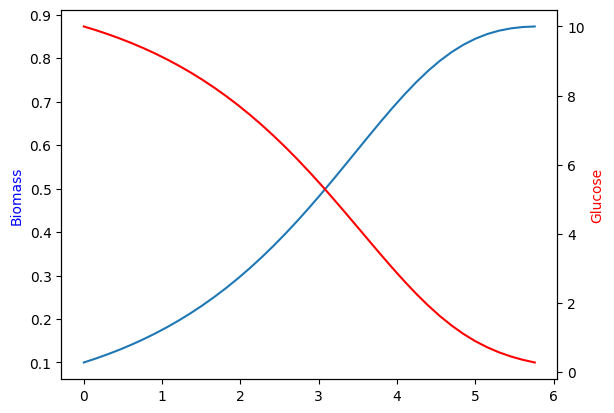

In [ ]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y.T[:, 0])
ax2 = plt.twinx(ax)
ax2.plot(sol.t, sol.y.T[:, 1], color='r')

ax.set_ylabel('Biomass', color='b')
ax2.set_ylabel('Glucose', color='r')

Adicionando o etanol e sua função

In [ ]:
def add_dynamic_bounds(model, y):
    """Use external concentrations to bound the uptake flux of glucose and production of ethanol."""
    biomass, glucose, etoh = y  # expand the boundary species
    glucose_max_import = -10 * glucose / (5 + glucose)
    model.reactions.EX_glc__D_e.lower_bound = glucose_max_import
    etoh_max_export = 10 * biomass # Example linear dependence
    model.reactions.EX_etoh_e.lower_bound = -etoh_max_export


def dynamic_system(t, y):
    """Calculate the time derivative of external species."""
    biomass, glucose, etoh = y  # expand the boundary species

    # Calculate the specific exchanges fluxes at the given external concentrations.
    with model:
        add_dynamic_bounds(model, y)

        solution = model.optimize()
        if solution.status != 'optimal':
            raise RuntimeError(f"Optimization failed at time {t}")

        # Get the specific exchange fluxes
        glucose_flux = solution.fluxes['EX_glc__D_e']
        etoh_flux = solution.fluxes['EX_etoh_e']
        growth_rate = solution.objective_value

    # Calculate the time derivatives
    d_biomass = growth_rate * biomass
    d_glucose = glucose_flux * biomass
    d_etoh = etoh_flux * biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return [d_biomass, d_glucose, d_etoh]

dynamic_system.pbar = None

def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """
    with model:
        add_dynamic_bounds(model, y)
        solution = model.optimize()
        feasibility = solution.status == 'optimal'

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True


import numpy as np
from tqdm import tqdm
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definindo as condições iniciais e intervalo de tempo
ts = np.linspace(0, 15, 100)  # Desired integration resolution and interval
y0 = [0.1, 10, 0]  # Initial conditions: biomass, glucose, and etoh

# Executando a integração com a barra de progresso
with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

# Plotando os resultados no mesmo gráfico
fig, ax1 = plt.subplots()

# Plotando biomassa no eixo Y principal
ax1.plot(sol.t, sol.y.T[:, 0], 'b-', label='Biomass')
ax1.set_xlabel('Time')
ax1.set_ylabel('Biomass', color='b')

# Criando um segundo eixo Y para glicose
ax2 = ax1.twinx()
ax2.plot(sol.t, sol.y.T[:, 1], 'r-', label='Glucose')
ax2.set_ylabel('Glucose', color='r')

# Criando um terceiro eixo Y para etanol
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(sol.t, sol.y.T[:, 2], 'g-', label='Ethanol')
ax3.set_ylabel('Ethanol', color='g')

# Adicionando legendas
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()


SyntaxError: invalid syntax (<ipython-input-24-4196d1fc24e0>, line 6)

#FVA Sampling and perturbation analysis

In [ ]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
GLCe,BOUNDARY_GLCe,10,6,100.00%
HNO3e,BOUNDARY_HNO3e,3.886,0,0.00%
O2e,BOUNDARY_O2e,7.778,0,0.00%
PIe,BOUNDARY_PIe,0.115,0,0.00%
SLFe,BOUNDARY_SLFe,0.04548,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
CO2e,BOUNDARY_CO2e,-18.39,1,100.00%
H2Oe,BOUNDARY_H2Oe,-26.37,0,0.00%
He,BOUNDARY_He,-0.0112,0,0.00%
BIOMASS,DRAIN_Biomass,-0.9399,0,0.00%


In [ ]:
# build a phenotype simulator
from mewpy.simulation import get_simulator
simul = get_simulator(model)

len(simul.reactions)

2320

vamos encontrar um alvo dentro do PPP e fixar o modelo nele para entender as reações por FVA.

<AxesSubplot:xlabel='DRAIN_Biomass', ylabel='BOUNDARY_SUCCe'>

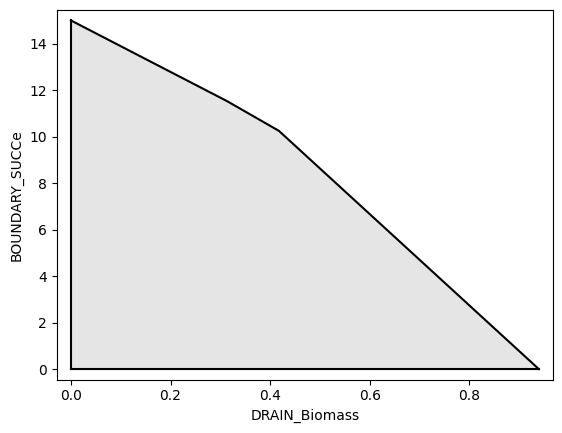

In [ ]:
from mewpy.visualization.envelope import plot_flux_envelope
plot_flux_envelope(simul,'DRAIN_Biomass','BOUNDARY_SUCCe')

Vamos escolher o crescimento de 0.6 e colocar o objetivo para succinato.

In [ ]:
model.objective = 'BOUNDARY_SUCCe'
model.reactions.DRAIN_Biomass.lower_bound = 0.6

model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
GLCe,BOUNDARY_GLCe,10,6,100.00%
HNO3e,BOUNDARY_HNO3e,2.481,0,0.00%
O2e,BOUNDARY_O2e,3.31,0,0.00%
PIe,BOUNDARY_PIe,0.07341,0,0.00%
SLFe,BOUNDARY_SLFe,0.02904,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
CO2e,BOUNDARY_CO2e,-6.747,1,20.18%
H2Oe,BOUNDARY_H2Oe,-18.52,0,0.00%
He,BOUNDARY_He,-0.007151,0,0.00%
SUCCe,BOUNDARY_SUCCe,-6.672,4,79.82%


In [ ]:
print(model.objective)

Maximize
1.0*BOUNDARY_SUCCe - 1.0*BOUNDARY_SUCCe_reverse_f3d11


agora vamos rodar o FVA para pegar os intervalos

In [ ]:
simul = get_simulator(model)

fva = simul.FVA(format = bool('df'))

In [ ]:
import pandas as pd

fva = pd.DataFrame(fva).transpose()
fva.columns = ['minimum','maximum']
fva.reset_index(inplace=True)
fva.rename(columns={'index':'reaction'}, inplace=True)
fva

,reaction,minimum,maximum
0,NE1,0.0,11.839718
1,NE2,0.0,11.839718
2,r1,-1000.0,21.839718
3,r2,0.0,0.361603
4,r3,0.0,0.424720
...,...,...,...
2315,r2848,0.0,0.179315
2316,BOUNDARY_24DH356TMBALe,0.0,0.179315
2317,r2849,0.0,0.000000
2318,r2850,0.0,0.000000


criando uma coluna fva_space

In [ ]:
fva['fva space'] = abs(fva['maximum']) + abs(fva['minimum'])
fva

,reaction,minimum,maximum,fva space
0,NE1,0.0,11.839718,11.839718
1,NE2,0.0,11.839718,11.839718
2,r1,-1000.0,21.839718,1021.839718
3,r2,0.0,0.361603,0.361603
4,r3,0.0,0.424720,0.424720
...,...,...,...,...
2315,r2848,0.0,0.179315,0.179315
2316,BOUNDARY_24DH356TMBALe,0.0,0.179315,0.179315
2317,r2849,0.0,0.000000,0.000000
2318,r2850,0.0,0.000000,0.000000


vamos adicionar os valroes de fluxo na tabela de fva

In [ ]:
pfba = simul.simulate(method='pFBA')
fba = pfba.fluxes
fba = pd.DataFrame(list(fba.items()), columns=['reaction', 'fluxes'])

#juntar df fba com fva

fva = pd.merge(fba, fva, on='reaction', how='inner')
fva

,reaction,fluxes,minimum,maximum,fva space
0,NE1,0.0,0.0,11.839718,11.839718
1,NE2,0.0,0.0,11.839718,11.839718
2,r1,0.0,-1000.0,21.839718,1021.839718
3,r2,0.0,0.0,0.361603,0.361603
4,r3,0.0,0.0,0.424720,0.424720
...,...,...,...,...,...
2315,r2848,0.0,0.0,0.179315,0.179315
2316,BOUNDARY_24DH356TMBALe,0.0,0.0,0.179315,0.179315
2317,r2849,0.0,0.0,0.000000,0.000000
2318,r2850,0.0,0.0,0.000000,0.000000


Existem muitas reações com fva space de 2000. Ou seja, elas podem assumir qualquer valor para melhorar a função objetivo.

In [ ]:
#reações com o espaço inteiro
len(fva.loc[fva['fva space'] > 1999])

53

In [ ]:
#retirando os null values
filtred_fva = fva.loc[fva['fva space'] != 0]
len(filtred_fva)

1717

Existem reações que possuem um espaço de FVA enorme, enquanto outras não. O que isso quer dizer?

- Espaço Grande: Maior flexibilidade, adaptabilidade, menor impacto no desempenho do modelo.
- Espaço Pequeno: Menor flexibilidade, reações críticas, maior impacto na função do modelo

In [ ]:
#filtrando apenas os fluxos relevantes.
filtred_fva.loc[(filtred_fva['fluxes'] >= 10e-3 ) | (filtred_fva['fluxes'] <= -10e-3)]

,reaction,fluxes,minimum,maximum,fva space
6,r5a,10.000000,0.000000,21.839718,21.839718
8,r7,33.549120,-1000.000000,1000.000000,2000.000000
11,r10,14.039587,0.000000,989.819306,989.819306
13,r12a,14.039587,-1.192807,989.024508,990.217316
14,r13a,13.965382,3.114555,499.545871,502.660426
...,...,...,...,...,...
1907,r2391,0.453675,-999.611496,1000.000000,1999.611496
2072,r2611,0.180000,0.180000,980.578460,980.758460
2161,r2683,0.102728,0.102728,0.319199,0.421927
2162,r2684,-0.102728,-0.319199,-0.102728,0.421927


Eu tenho essas 290 reações com fluxos relevantes que eu posso alterar para obter o mesmo resultado. Mas como utilizar isso para identificar genes? Será que eu preciso relacionar o FVA com shadow_prices e reduced costs?

- Shadow prices é sobre metabólitos
- Reduced Cost é sobre reações

- FVA fornece o intervalo de viabilidade para os fluxos das reações, mostrando como os fluxos podem variar sem afetar a solução ótima.
- Preços Sombra indicam a alteração na função objetivo se houver uma pequena mudança na disponibilidade de um recurso (por exemplo, a concentração de substratos).

- Se uma reação tem um intervalo de fluxo amplo (segundo o FVA) e um preço sombra significativo, isso pode indicar que pequenas alterações no fluxo dessa reação podem impactar a produtividade ou a eficiência.
- Se o preço sombra de um metabólito é alto e o FVA mostra que ela pode operar em um intervalo maior, você pode considerar aumentar ou diminuir seu fluxo para otimizar a produção.




In [ ]:
results = model.optimize()
reduced_costs = results.reduced_costs
reduced_costs = reduced_costs.to_frame()
reduced_costs.reset_index(inplace=True)
reduced_costs.rename(columns={'index':'reaction'}, inplace=True)
reduced_costs

,reaction,reduced_costs
0,NE1,-1.127033e-01
1,NE2,-1.127033e-01
2,r1,0.000000e+00
3,r2,-0.000000e+00
4,r3,-0.000000e+00
...,...,...
2315,r2848,0.000000e+00
2316,BOUNDARY_24DH356TMBALe,0.000000e+00
2317,r2849,0.000000e+00
2318,r2850,0.000000e+00


In [ ]:
fva = pd.merge(fva, reduced_costs, on='reaction', how='inner')
fva

,reaction,fluxes,minimum,maximum,fva space,reduced_costs
0,NE1,0.0,0.0,11.839718,11.839718,-1.127033e-01
1,NE2,0.0,0.0,11.839718,11.839718,-1.127033e-01
2,r1,0.0,-1000.0,21.839718,1021.839718,0.000000e+00
3,r2,0.0,0.0,0.361603,0.361603,-0.000000e+00
4,r3,0.0,0.0,0.424720,0.424720,-0.000000e+00
...,...,...,...,...,...,...
2315,r2848,0.0,0.0,0.179315,0.179315,0.000000e+00
2316,BOUNDARY_24DH356TMBALe,0.0,0.0,0.179315,0.179315,0.000000e+00
2317,r2849,0.0,0.0,0.000000,0.000000,0.000000e+00
2318,r2850,0.0,0.0,0.000000,0.000000,0.000000e+00


Vamos avaliar o preço sombra e o reduced cost novamente e seu efeito no FBA.

 O que eu penso:

 - Reduced cost negativo, indica que se eu diminuir essa reação, eu aumento o valor do meu objetivo.
 - Reduced cost positivo, indica que se eu aumentar essa reação, eu aumento o valor do meu objetivo

In [ ]:
fva.loc[(fva['fva space'] != 0)].sort_values(by='reduced_costs', ascending = True).head(50)

,reaction,fluxes,minimum,maximum,fva space,reduced_costs
990,r1265,0.0,0.0,3.184962e-02,3.184962e-02,-41.896122
989,r1266,0.0,0.0,3.201204e-02,3.201204e-02,-41.683558
1379,DRAIN_Biomass,0.6,0.6,6.339855e-01,1.233985e+00,-39.263118
2147,r2670,0.0,0.0,5.702724e-02,5.702724e-02,-23.398916
1489,r1966,0.0,0.0,6.033902e-02,6.033902e-02,-22.114640
1486,r1963,0.0,0.0,6.054472e-02,6.054472e-02,-22.039504
1484,r1961,0.0,0.0,6.054472e-02,6.054472e-02,-22.039504
1481,r1958,0.0,0.0,6.054472e-02,6.054472e-02,-22.039504
1487,r1964,0.0,0.0,6.075183e-02,6.075183e-02,-21.964369
1485,r1962,0.0,0.0,6.318975e-02,6.318975e-02,-21.116964


In [ ]:
fva.loc[(fva['fva space'] != 0)].sort_values(by='reduced_costs', ascending = False).head(20)

,reaction,fluxes,minimum,maximum,fva space,reduced_costs
190,r190,0.000000,0.000000,994.914807,994.914807,2.784568e-14
351,r290,2.480572,0.000000,1000.000000,1000.000000,2.778872e-14
542,r511,0.000000,0.000000,5.919859,5.919859,1.937142e-14
185,r186a,0.000000,0.000000,994.914807,994.914807,1.925230e-14
325,r261,2.690615,0.000000,1000.000000,1000.000000,1.509903e-14
326,r262,10.079972,0.000000,1000.000000,1000.000000,1.065814e-14
634,r612,0.105966,0.000000,4.445208,4.445208,1.034165e-14
1401,r184,0.000000,-1000.000000,1000.000000,2000.000000,1.018340e-14
157,r161,0.000000,0.000000,17.807598,17.807598,9.428027e-15
189,r1286,-0.108000,-1000.000000,1000.000000,2000.000000,7.774277e-15


Segundo essa análise, o reduced cost não me dá valores altos, pois eu travei a função objetivo no seu máximo!

In [ ]:
#shadow prices é sobre metabólitos
len(pfba.shadow_prices)

1818

In [ ]:
# Converter para DataFrame
data = pfba.shadow_prices
sp = pd.DataFrame(list(data.items()), columns=['metabolites', 'shadow price'])
sp.sort_values(by='shadow price', ascending = False).head(20)

,metabolites,shadow price
962,TGDMIPC,47846.755887
476,DGDMIPC,45811.425990
588,GDMIPC,43776.096093
496,DMIPC,41740.766196
751,MIPC,39701.436299
687,IPC,37662.106402
438,CLm,36555.236371
1422,TRIOe,26684.896907
957,TAGLY,26220.753649
525,ERGOSE,25655.279790


O preço sombra representa a variação na função objetivo por unidade adicional do metabolito. Um preço sombra positivo indica que aumentar a disponibilidade do metabolito levaria a um aumento na função objetivo

In [ ]:
for m in sp.metabolites:
  mr = model.metabolites.get_by_id(m)
  print(f'--{mr.id}--')
  for r in mr.reactions:
    print(r.id)

A saída de streaming foi truncada nas últimas 5000 linhas.
r1266
r354
PROTEINpolym
r2412
r2330
r357
--METe--
BOUNDARY_METe
r1111
NE19
r2179
--METH--
r2844
r357
--METHF--
r93
r94
--METHFm--
r90
r91
--METHOL--
r1193
r53a
r1194
r1141
--METHOLe--
r2151
r1141
BOUNDARY_METHOLe
--METTHF--
r298
r97
r1167
r96
r93
r299
r495
--METTHFm--
r308b
r1167
r91
r92
--MGC181--
r898
Lipidsassemb
--MGDG--
r897
r896
Lipidsassemb
--MI1P--
r826
r825
--MIPC--
r856
r857
--MLT--
r201a
r1145
--MLTe--
r1145
r202
BOUNDARY_MLTe
--MNT--
r1043
r189
r188
Pool
r190
r1286
--MNT1P--
r188
r187
r190
--MNTe--
r1043
BOUNDARY_MNTe
--MTHF--
r96
r362
--MTHFm--
r92
--MTHGXL--
r67
r64
r62
r63
--MTPHTH--
r1193
r1194
--MUCL--
r962
r961
--MUCO--
r960
r961
--MVL--
r863
r2607
r2132
r862
--MYOI--
r826
r2655
r1006
r828
--NAD--
r262
r2116
r93
r1961
r149a
r1900
r353
r412
r65
r115a
r2160
r370
r2826
r440
r240
r623
r145a
r289
r2127
r184c
r183
r1962
r371
r66
r304
r1286
r196
r1189
r146a
r45a
r122
r54
r1963
r325
r1203
r2111
r2348
r134
r628
r396
r6

# MAPA EM GRAFO

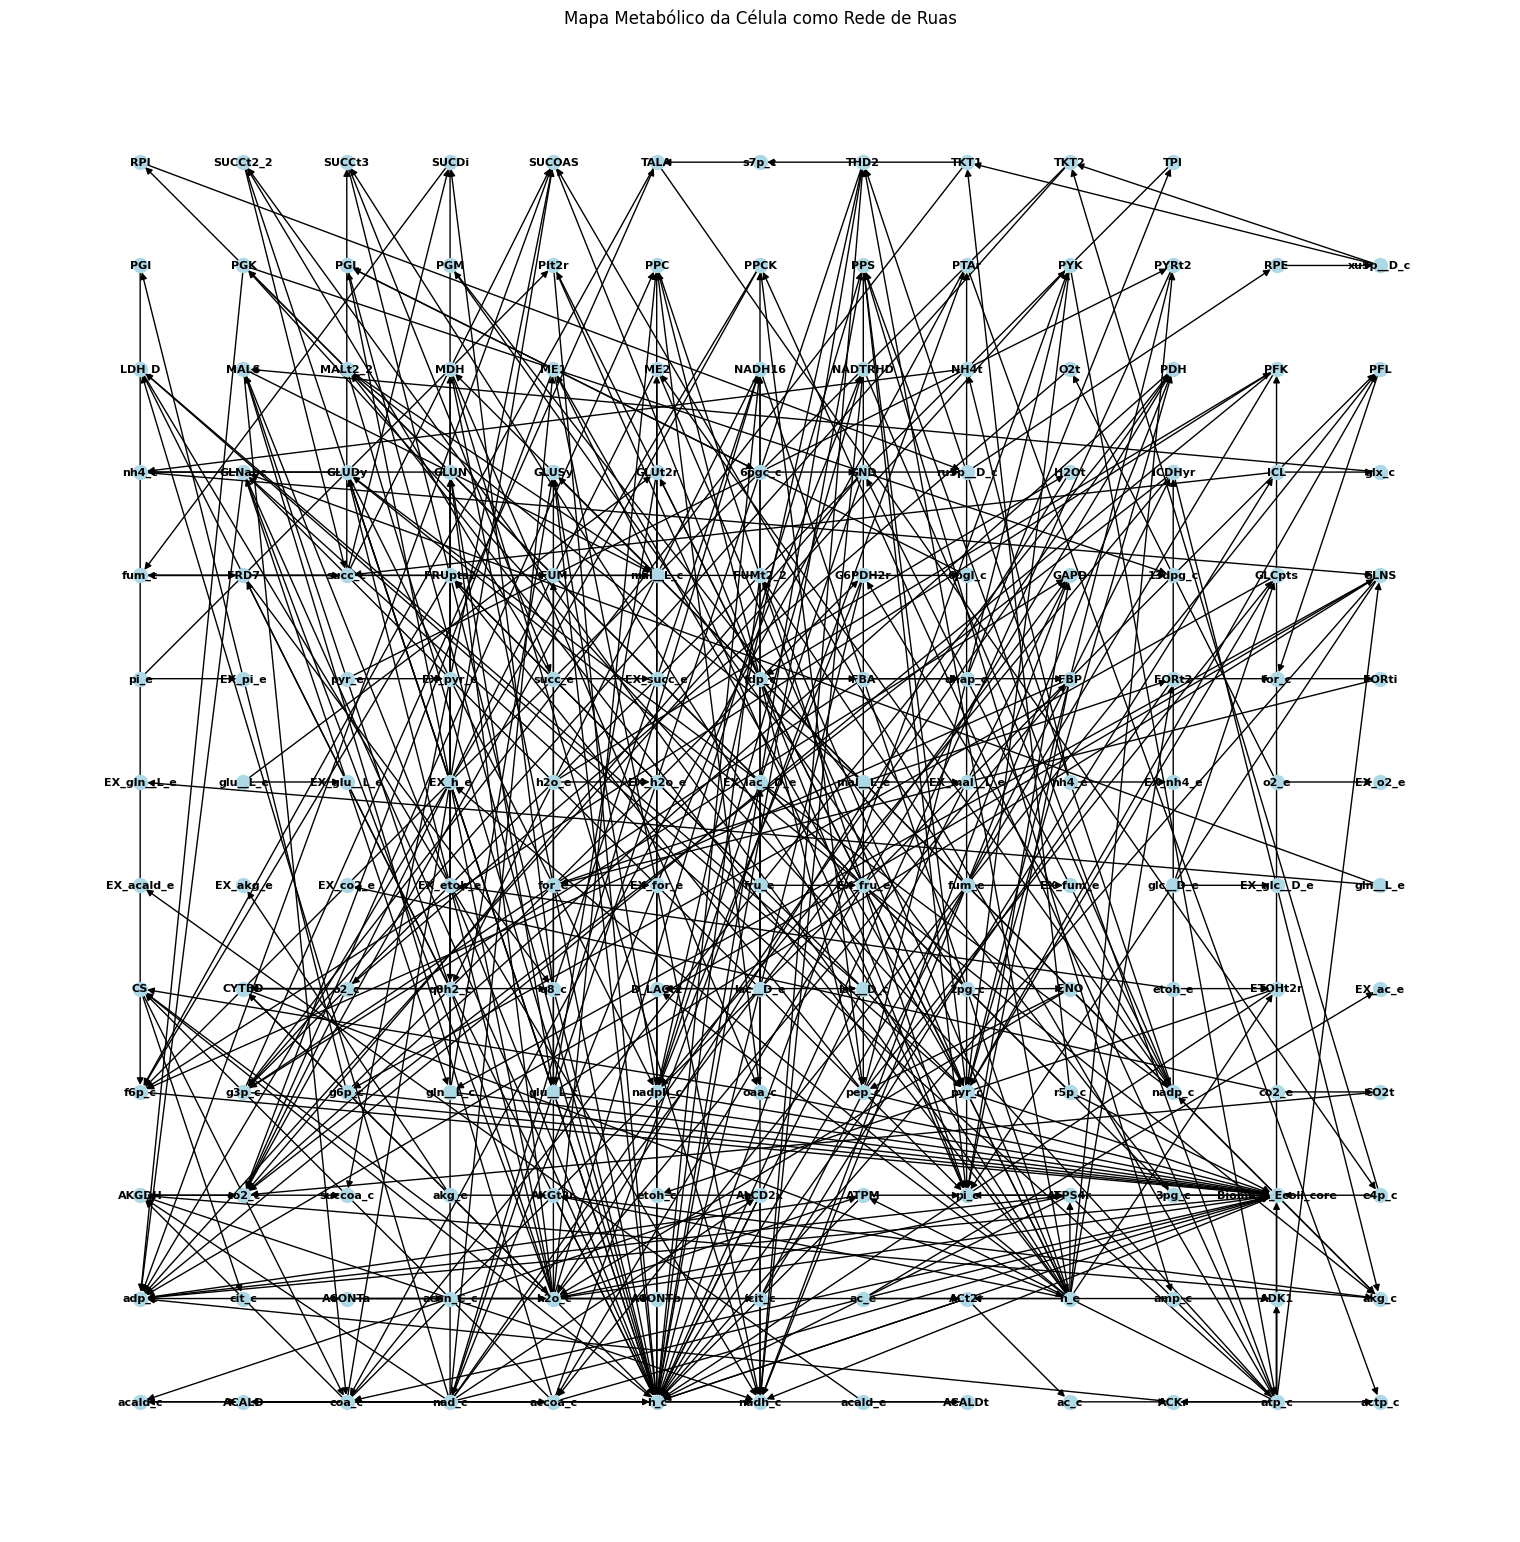

In [ ]:
import cobra
from cobra.io import load_model
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Carregar o modelo "textbook"
model = load_model("textbook")

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
for reaction in model.reactions:
    for metabolite in reaction.reactants:
        G.add_edge(metabolite.id, reaction.id)
    for metabolite in reaction.products:
        G.add_edge(reaction.id, metabolite.id)

# Criar um layout de ruas fictício
# Definir a posição dos nós em um layout de grid
def create_grid_layout(G):
    pos = {}
    nodes = list(G.nodes())
    grid_size = int(np.ceil(np.sqrt(len(nodes))))
    for i, node in enumerate(nodes):
        x = i % grid_size
        y = i // grid_size
        pos[node] = (x, y)
    return pos

# Aplicar o layout de grid ao grafo
pos = create_grid_layout(G)

# Ajustar o tamanho da figura para a visualização
plt.figure(figsize=(15, 15))

# Desenhar o grafo
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, edge_color='black', node_color='lightblue', font_weight='bold')

# Adicionar título
plt.title("Mapa Metabólico da Célula como Rede de Ruas")

# Mostrar o gráfico
plt.show()
